In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Input
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.applications import VGG19,ResNet50

In [2]:
(train_x, train_y), (test_x, test_y) = cifar10.load_data()

In [3]:
train_x = train_x.astype(np.float32) / 255.0
test_x = test_x.astype(np.float32) / 255.0

In [4]:
gen = ImageDataGenerator(
    rotation_range=20,
    shear_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

In [5]:
augment_ratio = 1.5
augment_size = int(augment_ratio * train_x.shape[0])

In [6]:
randIdx = np.random.randint(train_x.shape[0], size=augment_size)

In [7]:
augmented_x = train_x[randIdx].copy()
augmented_y = train_y[randIdx].copy()

In [8]:
augmented_x, augmented_y = gen.flow(
    augmented_x, 
    augmented_y,
    batch_size=augment_size,
    shuffle=False
).next()

In [9]:
train_x = np.concatenate((train_x, augmented_x))
train_y = np.concatenate((train_y, augmented_y))

In [10]:
s = np.arange(train_x.shape[0])
np.random.shuffle(s)

In [11]:
train_x = train_x[s]
train_y = train_y[s]

In [12]:
def CreateModel():
    baseModel = ResNet50(include_top=False,weights='imagenet',input_shape=(32,32,3),classes=train_y.shape[1])
    
    model= Sequential()
    model.add(baseModel)
    model.add(Flatten())
    
    model.add(Dense(1024,activation=('relu')))
    model.add(Dense(512,activation=('relu'))) 
    model.add(Dense(256,activation=('relu'))) 
    model.add(Dense(128,activation=('relu')))
    model.add(Dense(10,activation=('softmax'))) #This is the classification layer
    
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.summary()
    
    return model

In [13]:
model = CreateModel()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 1, 1, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 1024)              2098176   
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dense_3 (Dense)             (None, 128)               32896     
                                                                 
 dense_4 (Dense)             (None, 10)                1

In [14]:
history = model.fit(train_x, train_y, batch_size=256, epochs=30, validation_data=(test_x, test_y))

Epoch 1/30
489/489 [==============================] - 34s 52ms/step - loss: 0.9961 - accuracy: 0.6645 - val_loss: 3.4920 - val_accuracy: 0.1283
Epoch 2/30
489/489 [==============================] - 24s 50ms/step - loss: 0.6528 - accuracy: 0.7812 - val_loss: 1.1126 - val_accuracy: 0.6461
Epoch 3/30
489/489 [==============================] - 24s 50ms/step - loss: 0.5192 - accuracy: 0.8269 - val_loss: 0.7895 - val_accuracy: 0.7624
Epoch 4/30
489/489 [==============================] - 24s 50ms/step - loss: 0.4278 - accuracy: 0.8574 - val_loss: 0.7186 - val_accuracy: 0.7736
Epoch 5/30
489/489 [==============================] - 24s 50ms/step - loss: 0.3613 - accuracy: 0.8791 - val_loss: 0.9202 - val_accuracy: 0.7520
Epoch 6/30
489/489 [==============================] - 24s 50ms/step - loss: 0.3033 - accuracy: 0.8982 - val_loss: 0.6669 - val_accuracy: 0.7944
Epoch 7/30
489/489 [==============================] - 24s 50ms/step - loss: 0.2621 - accuracy: 0.9126 - val_loss: 0.8595 - val_accuracy:

### 80.61 %

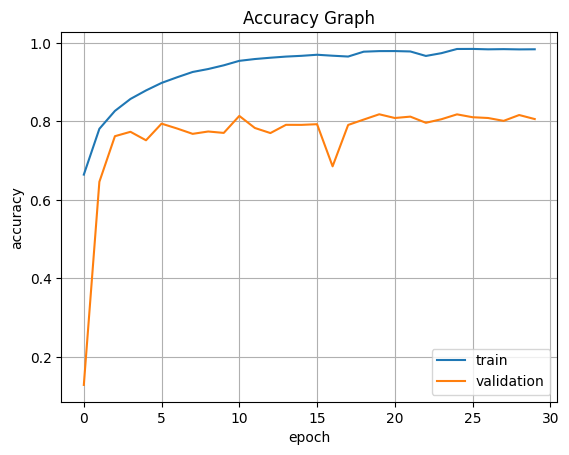

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy Graph')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='best')
plt.grid()
plt.show()

In [16]:
model.save('80.61.model')

INFO:tensorflow:Assets written to: 80.61.model\assets


INFO:tensorflow:Assets written to: 80.61.model\assets
